<strong><b><font size="5">Forecasting - Previsões Para Séries Temporais - Modelos ARIMA</font></b></strong>

Em Estatística e Econometria, e em particular na análise de séries temporais, um modelo de média móvel integrada auto-regressiva (ARIMA) é uma generalização de um modelo de média móvel auto-regressiva (ARMA). 

Ambos os modelos são ajustados a dados de séries temporais para melhor entender os dados ou para prever pontos futuros na série (previsão). Os modelos ARIMA são aplicados em alguns casos em que os dados mostram evidências de não estacionariedade, onde uma etapa inicial de diferenciação (correspondente à parte "integrada" do modelo) pode ser aplicada uma ou mais vezes para eliminar a não estacionariedade. 

A parte AR do ARIMA indica que a variável de interesse em evolução é regredida com seus próprios valores defasados (isto é, anteriores). A parte MA indica que o erro de regressão é na verdade uma combinação linear de termos de erro cujos valores ocorreram contemporaneamente e em vários momentos no passado. O I (para "integrado") indica que os valores dos dados foram substituídos pela diferença entre seus valores e os valores anteriores (e esse processo de diferenciação pode ter sido executado mais de uma vez). O objetivo de cada um desses recursos é fazer com que o modelo ajuste os dados da melhor maneira possível.

Modelos ARIMA não sazonais são geralmente designados ARIMA(p, d, q), em que os parâmetros p, d e q são números inteiros não negativos, p é a ordem (número de intervalos de tempo) do modelo autoregressivo, d é o grau de diferenciação (o número de vezes que os dados tiveram valores passados subtraídos) e q é a ordem do modelo de média móvel. 

Modelos ARIMA sazonais são geralmente designados ARIMA (p, d, q) (P, D, Q) m, em que m refere-se ao número de períodos em cada season e os maiúsculos P, D, Q referem-se ao autorregressivo, diferenciado, e termos da média móvel da parte sazonal do modelo ARIMA.

Quando dois dos três termos são zeros, o modelo pode ser referido com base no parâmetro diferente de zero, eliminando "AR", "I" ou "MA" da sigla que descreve o modelo. Por exemplo, ARIMA (1,0,0) é AR (1), ARIMA (0,1,0) é I (1) e ARIMA (0,0,1) é MA (1).

Os Modelos ARIMA são estudados em detalhes e aplicados em diversos e diferentes casos de uso nos cursos <a href="https://www.datascienceacademy.com.br/course?courseid=analise-econometrica-em-r">Análise Econométrica em R</a> e <a href="https://www.datascienceacademy.com.br/course?courseid=analise-estatistica-para-data-science-ii">Análise Estatística Para Data Science II</a>. O curso de <a href="https://www.datascienceacademy.com.br/course?courseid=anlise-de-dados-com-matlab">Business Analytics</a> também tem projetos onde aplicamos Modelos ARIMA.

Teremos algumas aulas para estudar Modelos Arima. Mas já vamos começar com nosso primeiro modelo.

### Carregando os Pacotes Usados Neste Jupyter Notebook

In [ ]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook, se necessário.

In [ ]:
# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
#!pip install -q -U watermark

In [1]:
# As novas versões do Pandas e Matplotlib trazem diversas mensagens de aviso ao desenvolvedor. Vamos desativar isso.
import sys
import warnings
import matplotlib.cbook
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

# Imports para manipulação de dados
import numpy as np
import pandas as pd
from datetime import datetime

# Imports para visualização de dados
import matplotlib.pyplot as plt
import matplotlib as m

# Imports para modelagem preditiva
import statsmodels
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf, pacf 
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose 

# Imports para métricas e performance do modelo
import math
from math import sqrt 
import sklearn
from sklearn.metrics import mean_squared_error 

# Imports para formatação dos gráficos
plt.style.use('fivethirtyeight')
m.rcParams['axes.labelsize'] = 14
m.rcParams['xtick.labelsize'] = 12
m.rcParams['ytick.labelsize'] = 12
m.rcParams['text.color'] = 'k'
from matplotlib.pylab import rcParams 
rcParams['figure.figsize'] = 20,10

## Definição do Problema de Negócio

A HappyMoonVC é uma Venture Capital (VC).

Venture Capital (VC) é um tipo de fundo de investimento focado em capital de crescimento para empresas de médio porte que já possuem carteira de clientes e receita, mas que ainda precisam dar um salto de crescimento. 

VCs investem em empresas iniciantes, Startups e emergentes que foram consideradas com alto potencial de crescimento ou que demonstraram alto crescimento (em termos de número de funcionários, receita anual ou ambos).

A HappyMoonVC está analisando um novo e promissor negócio sugerido por uma Startup, o GoInRail.

O GoInRail é um método de transporte inovador que usa a tecnologia de propulsão a jato para executar um veículo similar a um Drone, mas sobre trilhos (que mantém o Drone carregado com energia elétrica) e transportar pessoas em alta velocidade!

O investimento só fará sentido se o GoInRail conseguir mais de 1 milhão de usuários mensais nos próximos 18 meses.

Nosso trabalho é analisar dados de séries temporais com a demanda de transporte em uma determinada região e prever a demanda pelo GoInRail, que ajude a HappyMoonVC a tomar sua decisão de investimento.

## Conjunto de Dados

Usaremos conjuntos de dados fictícios que mostram a demanda de clientes por transporte em uma determinada região. Para cada dia da semana, foi contabilizado quantas pessoas usaram o sistema de transporte na região. Os dados tem registros dos anos de 2017, 2018 e 2019.

São fornecidos 2 datasets:

- O primeiro possui 3 colunas, com id, data e total de clientes que usaram algum tipo de transporte. Será nossos dados de treino.

- O segundo possui 2 colunas, com id e data para os anos de 2019 e 2020. Será nosso dataset de teste.

In [2]:
# Carrega os dados
dados_treino = pd.read_csv("data/train.csv")
dados_teste = pd.read_csv("data/test.csv")

Vamos fazer algumas transformações nos dados para criar o modelo.

In [3]:
# Converte a coluna Datetime para o tipo correto
dados_treino['Datetime'] = pd.to_datetime(dados_treino.Datetime, format = '%d-%m-%Y %H:%M')

In [4]:
# Converte a coluna Datetime para o tipo correto
dados_teste['Datetime'] = pd.to_datetime(dados_teste.Datetime, format = '%d-%m-%Y %H:%M')

In [5]:
# Vamos extrair os detalhes da coluna Datetime: ano, mês, dia e hora
for i in (dados_treino, dados_teste):
    i['ano'] = i.Datetime.dt.year
    i['mes'] = i.Datetime.dt.month
    i['dia'] = i.Datetime.dt.day
    i['hora'] = i.Datetime.dt.hour

In [6]:
# Precisamos do dia da semana também
dados_treino['dia_semana'] = dados_treino['Datetime'].dt.dayofweek

In [7]:
# Seria bom verificar se o fato de ser final de semana ou não impacta no uso de transporte. 
# Vamos extrair essa informação. Dias da semana iguais a 5 ou 6 são sábado e domingo.

# Criamos uma função, onde marcamos final de semana como 1 e dias úteis como 0
def converteFimSemana(registro):
    if registro.dayofweek == 5 or registro.dayofweek == 6:
        return 1
    else:
        return 0

In [8]:
# Agora aplicamos a função
dados_treino['final_semana'] = dados_treino['Datetime'].apply(converteFimSemana)

In [9]:
# Vejamos como ficou o dataset
dados_treino.head()

,ID,Datetime,Count,ano,mes,dia,hora,dia_semana,final_semana
0,0,2017-08-25 00:00:00,8,2017,8,25,0,4,0
1,1,2017-08-25 01:00:00,2,2017,8,25,1,4,0
2,2,2017-08-25 02:00:00,6,2017,8,25,2,4,0
3,3,2017-08-25 03:00:00,2,2017,8,25,3,4,0
4,4,2017-08-25 04:00:00,2,2017,8,25,4,4,0


In [10]:
# Refinamos os dados para o gráfico da série original

# Definimos o índice do dataset
dados_treino.index = dados_treino['Datetime']

# Removemos a coluna ID, pois ela não é relevante neste caso
features = dados_treino.drop('ID',1)

# A variável Count é nossa variável target (total de pessoas que usaram transporte)
target = dados_treino['Count']

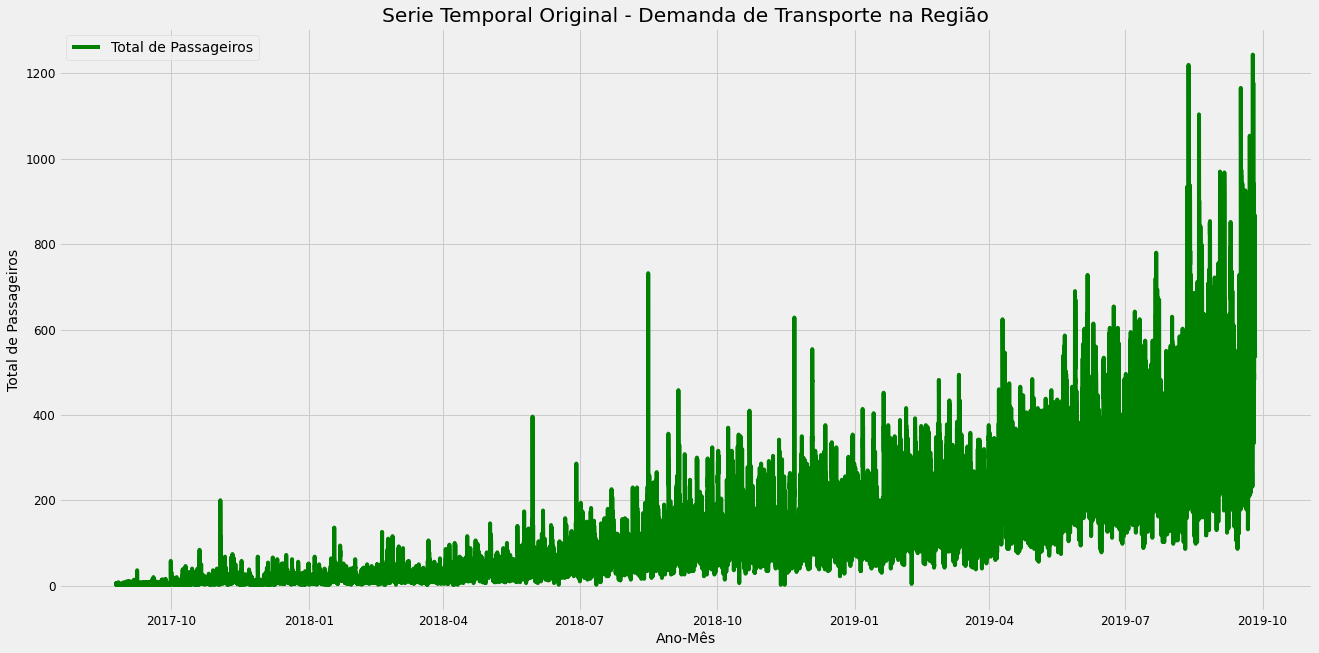

In [11]:
# Plot
plt.title("Serie Temporal Original - Demanda de Transporte na Região")
plt.plot(target, label = "Total de Passageiros", color = 'green')
plt.xlabel("Ano-Mês")
plt.ylabel("Total de Passageiros")
plt.legend(loc = "best")

Vamos testar a estacionaridade da série.

In [12]:
# Função para testar a estacionaridade
def testa_estacionaridade(serie):
    
    # Calcula estatísticas móveis
    rolmean = serie.rolling(window = 12).mean()
    rolstd = serie.rolling(window = 12).std()

    # Plot das estatísticas móveis
    orig = plt.plot(serie, color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Média Móvel')
    std = plt.plot(rolstd, color = 'black', label = 'Desvio Padrão')
    plt.legend(loc = 'best')
    plt.title('Estatísticas Móveis - Média e Desvio Padrão')
    plt.show()
    
    # Teste Dickey-Fuller:
    # Print
    print('\nResultado do Teste Dickey-Fuller:\n')

    # Teste
    dfteste = adfuller(serie, autolag = 'AIC')

    # Formatando a saída
    dfsaida = pd.Series(dfteste[0:4], index = ['Estatística do Teste',
                                               'Valor-p',
                                               'Número de Lags Consideradas',
                                               'Número de Observações Usadas'])

    # Loop por cada item da saída do teste
    for key, value in dfteste[4].items():
        dfsaida['Valor Crítico (%s)'%key] = value

    # Print
    print (dfsaida)
    
    # Testa o valor-p
    print ('\nConclusão:')
    if dfsaida[1] > 0.05:
        print('\nO valor-p é maior que 0.05 e, portanto, não temos evidências para rejeitar a hipótese nula.')
        print('Essa série provavelmente não é estacionária.')
    else:
        print('\nO valor-p é menor que 0.05 e, portanto, temos evidências para rejeitar a hipótese nula.')
        print('Essa série provavelmente é estacionária.')

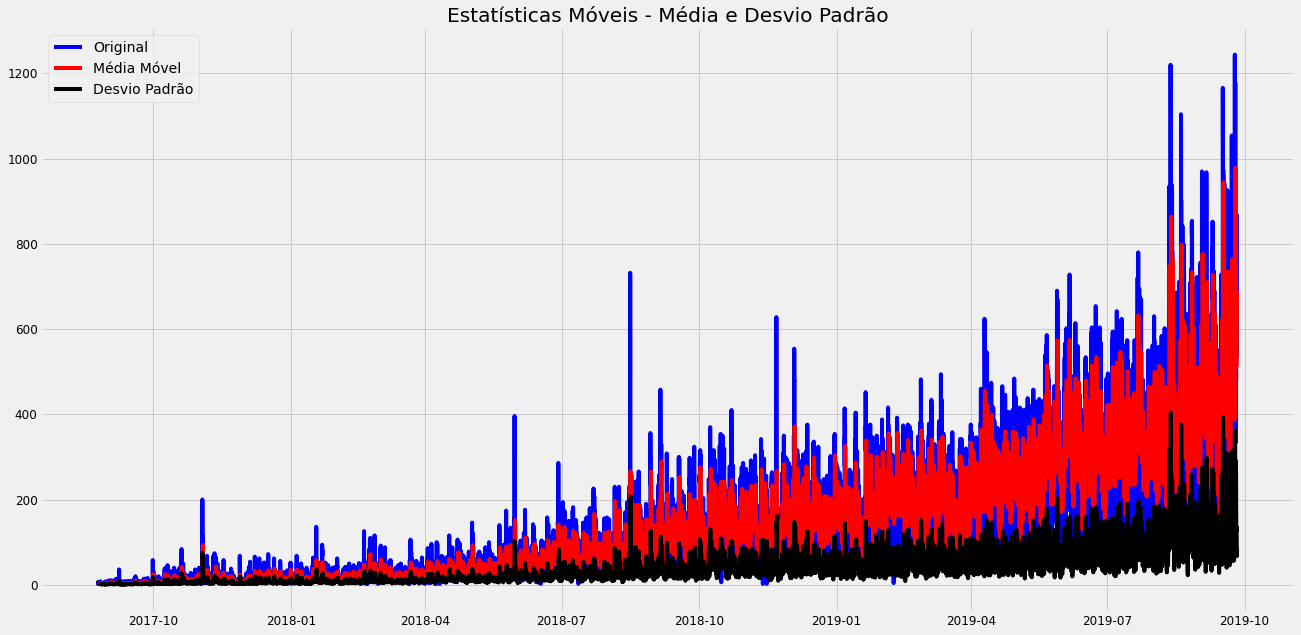


Resultado do Teste Dickey-Fuller:

Estatística do Teste               -4.456561
Valor-p                             0.000235
Número de Lags Consideradas        45.000000
Número de Observações Usadas    18242.000000
Valor Crítico (1%)                 -3.430709
Valor Crítico (5%)                 -2.861698
Valor Crítico (10%)                -2.566854
dtype: float64

Conclusão:

O valor-p é menor que 0.05 e, portanto, temos evidências para rejeitar a hipótese nula.
Essa série provavelmente é estacionária.


In [13]:
# Aplica a função 
testa_estacionaridade(dados_treino['Count'])

A série não apresenta padrão de sazonalidade, mas percebemos claramente a tendência e algum ruído.

## Pré-Processamento

Vamos dividir os dados de treino e validação para treinar e validar a performance do modelo antes de usar os dados de teste.

In [14]:
# Os dados de treino serão divididos em dados de treino e validação.
# Observe que os registros são separados em ordem cronológica.
df_treino = dados_treino.iloc[0:16057]
df_valid = dados_treino.iloc[16058:]

In [15]:
df_treino.shape

(16057, 9)

In [16]:
df_valid.shape

(2230, 9)

Para Modelos ARIMA, devemos remover a tendência. Vamos fazer isso.

In [17]:
# Aplicando transformação de log
df_treino_log = np.log(df_treino['Count']) 

In [18]:
# Moving Average (Média Móvel)
media_movel = df_treino_log.rolling(24).mean() 

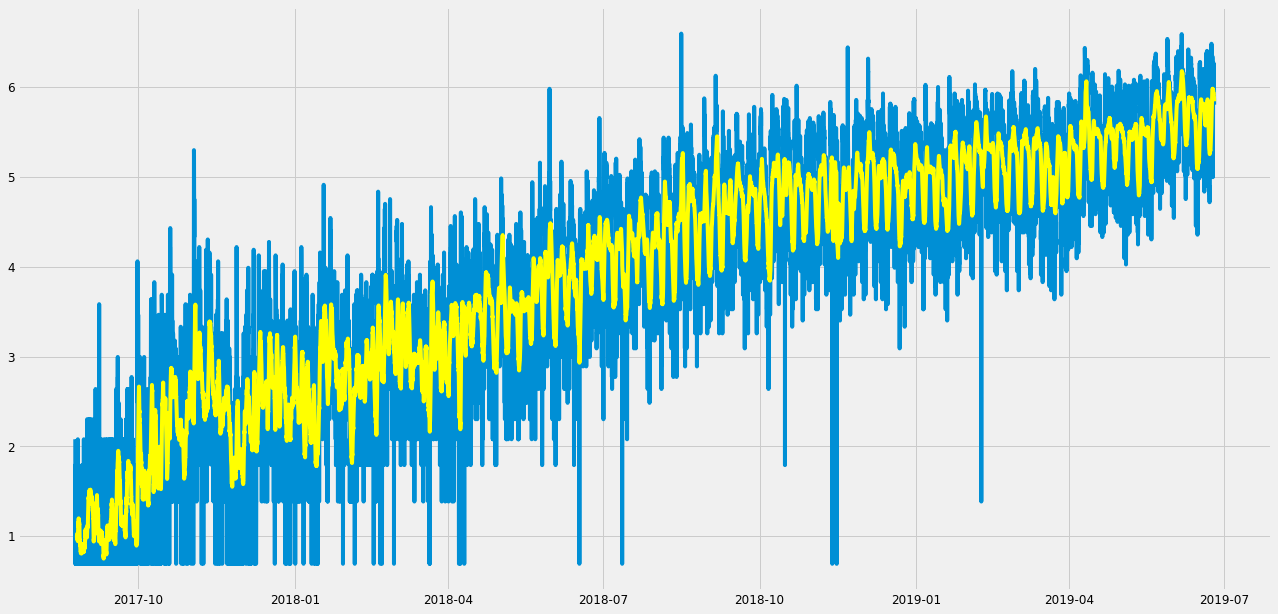

In [19]:
# Plot
plt.plot(df_treino_log) 
plt.plot(media_movel, color = 'yellow') 
plt.show()

Agora aplicamos a diferenciação.

In [20]:
# Diferenciação
df_treino_media_movel_diff = df_treino_log - media_movel
df_treino_media_movel_diff.dropna(inplace = True) 

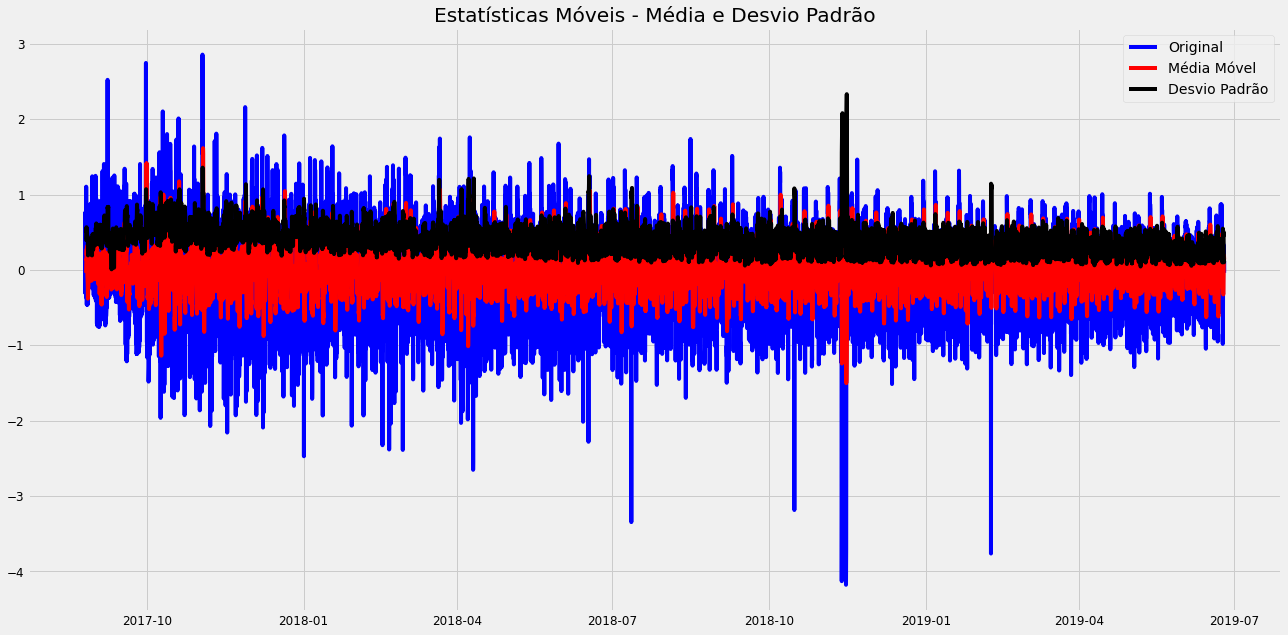


Resultado do Teste Dickey-Fuller:

Estatística do Teste              -22.471885
Valor-p                             0.000000
Número de Lags Consideradas        43.000000
Número de Observações Usadas    15990.000000
Valor Crítico (1%)                 -3.430759
Valor Crítico (5%)                 -2.861721
Valor Crítico (10%)                -2.566866
dtype: float64

Conclusão:

O valor-p é menor que 0.05 e, portanto, temos evidências para rejeitar a hipótese nula.
Essa série provavelmente é estacionária.


In [21]:
# Aplica a função para checar a estacionaridade
testa_estacionaridade(df_treino_media_movel_diff)

Humm. Não estou satisfeito. As linhas vermelha e preta ainda parecem ter um leve padrão, no qual a média e desvio padrão variam ao longo do tempo. Por menor que seja o padrão, ele deve ser removido. Vamos tentar mais uma diferenciação agora usando a função shift().

In [22]:
# Usando a função shift para mover a série em 1 e calcular a diferença.
df_treino_log_diff = df_treino_log - df_treino_log.shift(1) 

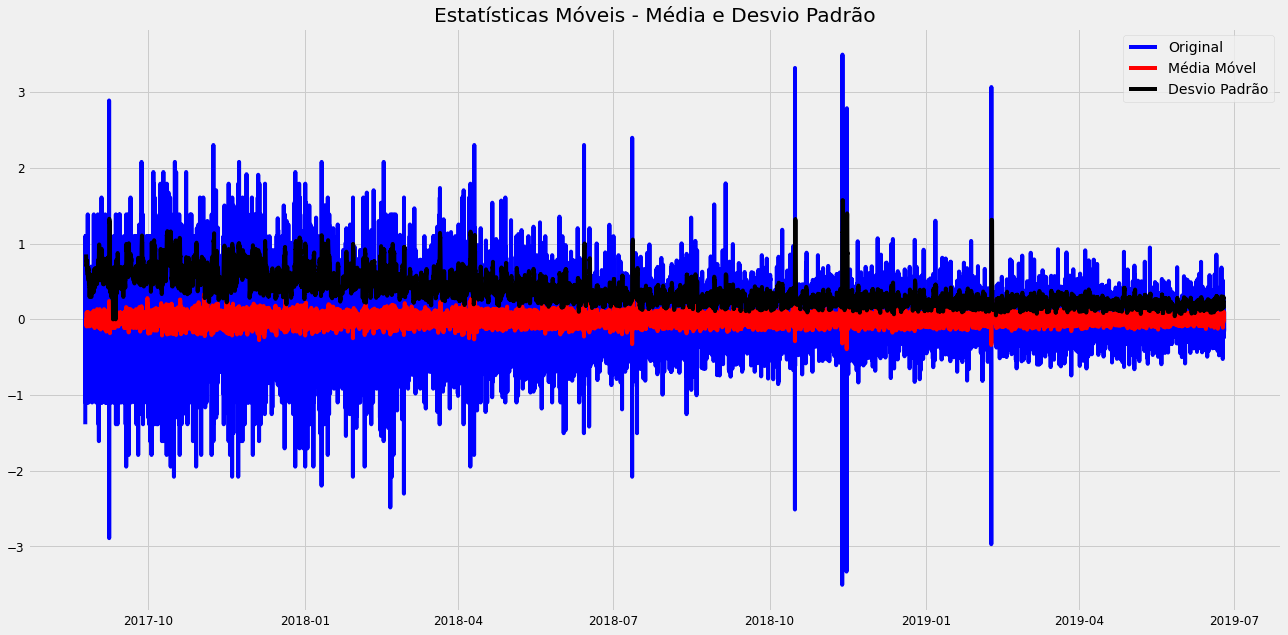


Resultado do Teste Dickey-Fuller:

Estatística do Teste              -28.580228
Valor-p                             0.000000
Número de Lags Consideradas        43.000000
Número de Observações Usadas    16012.000000
Valor Crítico (1%)                 -3.430758
Valor Crítico (5%)                 -2.861721
Valor Crítico (10%)                -2.566866
dtype: float64

Conclusão:

O valor-p é menor que 0.05 e, portanto, temos evidências para rejeitar a hipótese nula.
Essa série provavelmente é estacionária.


In [23]:
# Aplica a função para checar a estacionaridade
testa_estacionaridade(df_treino_log_diff.dropna())

Perfeito. Tendência removida da série. 

Vamos criar nosso Modelo ARIMA.

## Forecasting - Modelagem Preditiva Para Séries Temporais

### Modelo ARIMA

Vamos criar nosso primeiro Modelo ARIMA. Para começar vamos criar um modelo simples, treiná-los e fazer previsões e nas aulas seguintes vamos explorar os detalhes de Modelos ARIMA, como interpretar o resultado, os resíduos e melhorar o modelo.

https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMA.html

In [24]:
# Cria o Modelo ARIMA

# Definimos:

# p = 2
# d = 1
# q = 0

# Aqui o valor q é zero, pois é apenas o modelo AR. Nas próximas aulas eu explico porque.

# Modelo
modelo_AR = ARIMA(df_treino_log, order = (2, 1, 0), freq = 'H')

Você pode estar se perguntando: Mas por que usamos os dados originais aqui? Não deveríamos usar a série diferenciada? 

De forma bem clara e objetiva, a resposta é: Não. 

Realizamos todas essas etapas de diferenciação e outras transformações para descobrir os coeficientes do modelo ARIMA. 

'I' no ARIMA significa Integração, que leva em consideração o número de dados diferenciados necessários para se tornar a série estacionária (ou seja, o Modelo ARIMA faz todo o trabalho). 

Realizamos essas etapas de diferenciação no início para encontra o valor ideal de "I". De fato, você deve comparar modelos diferentes com valores diferentes dessas variáveis para obter o melhor modelo.

O Pré-Processamento que fazemos nas séries temporais é para encontrar os melhores valores de p, d e q que colocamos aqui: order = (2, 1, 0).

Portanto, treinamos o modelo com TODOS os dados, a série inteira (dados de treino). Estudaremos isso nas aulas seguintes. 

In [25]:
# Treinamento
modelo_v1 = modelo_AR.fit(disp = -1)  

In [26]:
# Dados Reais e Previsões
dados_reais = df_treino_log_diff
previsoes = modelo_v1.fittedvalues

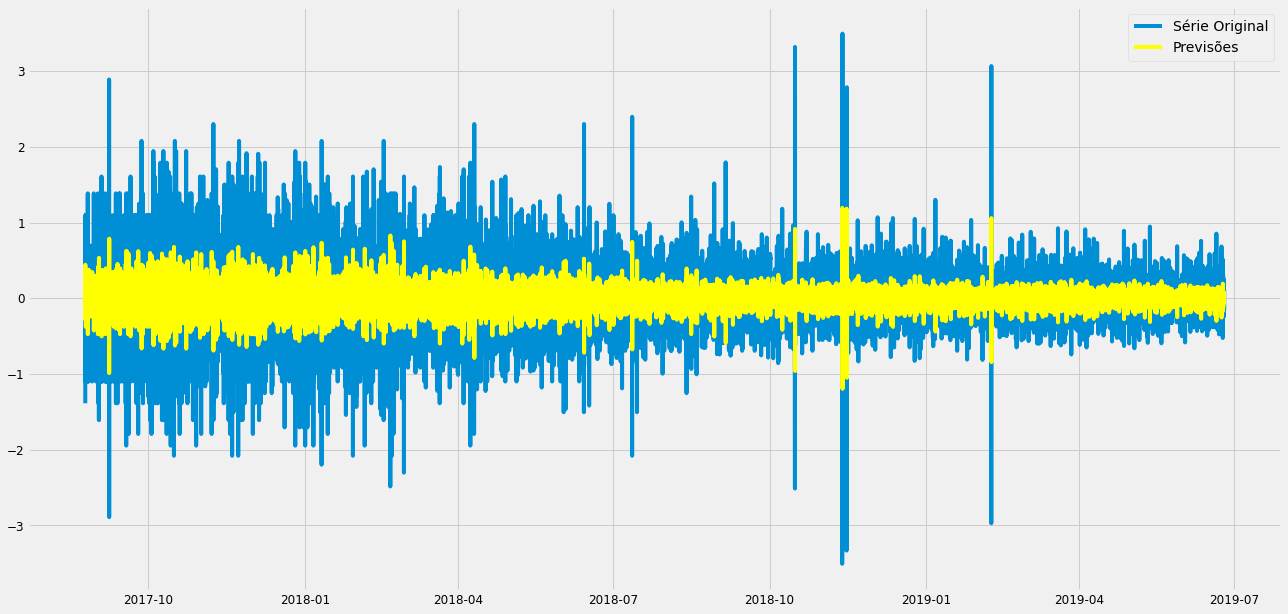

In [27]:
# Plot
plt.plot(dados_reais, label = 'Série Original') 
plt.plot(previsoes, color = 'yellow', label = 'Previsões') 
plt.legend(loc = 'best') 
plt.show()

Vamos fazer previsões com o modelo.

In [28]:
# Sumário do Modelo - Nas próximas aulas vamos interpretar esse sumário do modelo
modelo_v1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARIMA
====================================================================
Model:              ARIMA            BIC:                 16277.4337
Dependent Variable: D.Count          Log-Likelihood:      -8119.3   
Date:               2022-06-14 10:18 Scale:               1.0000    
No. Observations:   16056            Method:              css-mle   
Df Model:           3                Sample:              08-25-2017
Df Residuals:       16053                                 06-25-2019
Converged:          1.0000           S.D. of innovations: 0.401     
No. Iterations:     6.0000           HQIC:                16256.862 
AIC:                16246.6983                                      
---------------------------------------------------------------------
                 Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
---------------------------------------------------------------------
const            0.0003    0.0022    0.1143  0.9090  -0.0041   0.0047
ar.L1.D.Count   -0.3419    0.0079  -43.4205  0.0000  -0.3573  -0.3265
ar.L2.D.Count   -0.0695    0.0079   -8.8300  0.0000  -0.0850  -0.0541
-----------------------------------------------------------------------------
                 Real           Imaginary          Modulus          Frequency
-----------------------------------------------------------------------------
AR.1           -2.4583            -2.8874           3.7921            -0.3623
AR.2           -2.4583             2.8874           3.7921             0.3623
====================================================================

"""

Agora vamos fazer previsões com o modelo treinado.

https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARMAResults.forecast.html

In [29]:
# Você sabe que as transformações aplicadas nos dados de treino devem ser aplicadas nos dados de validação/teste.
df_valid_log = np.log(df_valid['Count'])

In [30]:
# Forecast
# O parâmetro alfa representa o intervalo de confiança, nesse caso, 95%
fc, se, conf = modelo_v1.forecast(len(df_valid), alpha = 0.05) 

In [31]:
# Previsões
fc

array([5.85341812, 5.848469  , 5.84716539, ..., 6.41848657, 6.41874302,
       6.41899948])

In [32]:
# Erro
se

array([ 0.40121703,  0.48030432,  0.5574978 , ..., 13.42013034,
       13.42314055, 13.42615008])

In [33]:
# Coeficientes
conf

array([[  5.0670472 ,   6.63978904],
       [  4.90708983,   6.78984817],
       [  4.75448979,   6.939841  ],
       ...,
       [-19.88448557,  32.72145871],
       [-19.89012901,  32.72761506],
       [-19.89577113,  32.73377008]])

In [34]:
# Precisamos criar um dataframe para criar o Plot
fc_series = pd.Series(fc, index = df_valid.index)
limite_inferior = pd.Series(conf[:, 0], index = df_valid.index)
limite_superior = pd.Series(conf[:, 1], index = df_valid.index)

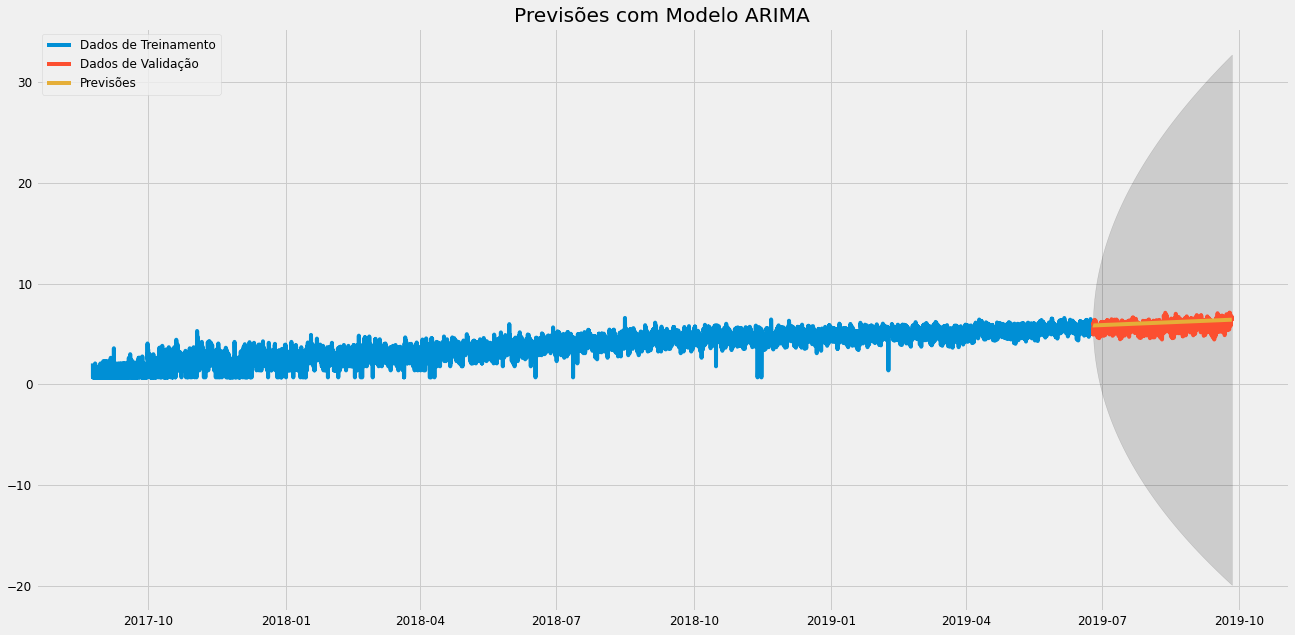

In [35]:
# Plot
plt.plot(df_treino_log, label = 'Dados de Treinamento')
plt.plot(df_valid_log, label = 'Dados de Validação')
plt.plot(fc_series, label = 'Previsões')
plt.fill_between(limite_inferior.index, limite_inferior, limite_superior, color = 'k', alpha = .15)
plt.title('Previsões com Modelo ARIMA')
plt.legend(loc = 'upper left', fontsize = 12)
plt.show()

Pronto! Temos a previsão da nossa série! Nosso modelo está muito bom e poderia ser usado para resolver nosso problema de negócio.


In [36]:
# Define valor real e valor previsto
y_true = df_valid_log
y_pred = fc_series

In [37]:
# Calcula o erro usando RMSE (Root Mean Squared Error)
metrica_rmse = sqrt(mean_squared_error(y_true, y_pred)) 
print(metrica_rmse)

0.5577767838050868


Opa! Reduzimos de forma considerável o erro do nosso modelo. Não é por acaso que Modelos ARIMA fazem tanto sucesso. 

Você pode estar estranhando o gráfico, mas o que fizemos foi usar a série com a transformação de log, o que muda a escala dos dados. Porém os dados são os mesmos.

Nas próximas aulas vou trazer diversos conceitos ligados a este tipo de modelo.